In [4]:
from roadrunner import roadrunner
import tellurium as te

roadrunner.Config.setValue(
    roadrunner.Config.LOADSBMLOPTIONS_CONSERVED_MOIETIES, True
)
model = te.loada("../../model/Komkova2025_antimony.txt")
vmax_oxphos_ref = model.V_OXPHOS


## Fig. 4b Dependence of OxPhos flux as a function of the maximal reaction velocity of the coarse-grained OxPhos reaction. 

In [5]:
import numpy as np


def simulate_for_oxphos(model, glu_e, vmax_oxphos):
    model.resetAll()
    model.V_OXPHOS = vmax_oxphos
    model.GLUe = glu_e
    model.simulate(0, 20, 1000)
    return model.OXPHOS


vmax_oxphos_scan = np.linspace(0, 35, 1000)

glu_e_scan = [0.5, 5, 25]
result = {}

for glu_e in glu_e_scan:
    result[glu_e] = []

    for vmax_oxphos in vmax_oxphos_scan:
        result[glu_e].append(simulate_for_oxphos(model, glu_e, vmax_oxphos))


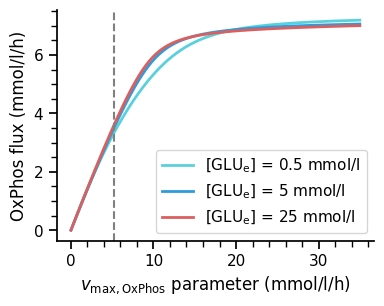

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

sns.set_context('notebook')
plt.figure(figsize=(4.1, 3))

colors = {0.5: '#59D1DC', 5: '#2D9CDB', 12: '#8A5FDB', 25: '#DB5F5F'}

for glu_e, oxphos in result.items():
    label = "$\mathregular{[GLU_e]}$ = %s mmol/l" % glu_e
    plt.plot(vmax_oxphos_scan, oxphos, label=label, color=colors[glu_e], lw=2)

plt.legend()
plt.ylabel("OxPhos flux (mmol/l/h)")

model.resetAll()
plt.axvline(vmax_oxphos_ref, ls='--', c='gray')

plt.xlabel("$v_\mathrm{max,OxPhos}$ parameter (mmol/l/h)")
plt.minorticks_on()

# path = "../../out/scan/oxphos_vs_vmax_vs_glue.png"
# plt.savefig(path, bbox_inches='tight', pad_inches=0, transparent=True, dpi=300)

path = "../../out/oxphos_vs_vmax_vs_glue.png"
plt.savefig(path, bbox_inches='tight', transparent=True, dpi=300)

plt.show()

## Fig. 4a Dependency of the specific growth rate on the maximal reaction velocity of the coarse-grained overall growth reaction.


In [7]:
from collections import defaultdict
import numpy as np


def simulate(model, glu_e, vmax_growth):
    model.resetAll()
    model.V_OXPHOS = vmax_oxphos_ref

    model.Vf_GROWTH = vmax_growth
    model.GLUe = glu_e
    model.simulate(0, 100, 1000)
    return model.Growth * 24


stop = 400
count = 2000
vmax_growth_scan = np.linspace(0, stop, count)

glu_e_scan = [0.5, 5, 12, 25]

result = defaultdict(list)

for glu_e in glu_e_scan:
    result[glu_e] = []

    for vmax_growth in vmax_growth_scan:
        growth = simulate(model, glu_e, vmax_growth)
        result[glu_e].append(growth)



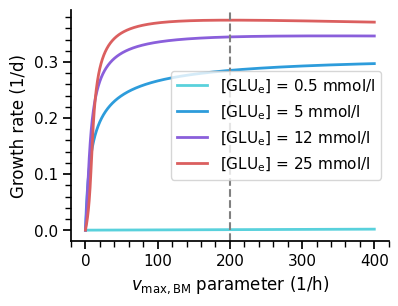

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
plt.figure(figsize=(4.1, 3))

colors = {0.5: '#59D1DC', 5: '#2D9CDB', 12: '#8A5FDB', 25: '#DB5F5F'}

for glu_e, growth_rates in result.items():
    label = "$\mathregular{[GLU_e]}$ = %s mmol/l" % glu_e
    plt.plot(vmax_growth_scan, growth_rates, color=colors[glu_e], label=label, lw=2)

plt.legend()
plt.minorticks_on()

plt.ylabel('Growth rate (1/d)')
plt.xlabel("$v_\mathrm{max,BM}$ parameter (1/h)")

model.resetAll()
plt.axvline(200, ls='--', c='gray')

path = "../../out/growth_vs_vmax_vs_glue.png"
plt.savefig(path, bbox_inches='tight', transparent=True, dpi=300)

plt.show()
